In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

In [15]:
df = pd.read_csv('FigS1.csv', sep = "\t")
df.head()

,Sample,RelativeChlorophyll,Green,Red,Greenness,Area(cm2)
0,F10-1-3,10.8,195.52,185.93,1.051550,0.528730
1,F10-12-1,26.0,160.72,154.36,1.074995,0.628490
2,F10-19-1,31.3,188.99,181.26,1.068175,0.716905
3,F11-10,40.7,178.42,159.75,1.115771,0.958091
4,F11-4,17.2,190.80,176.11,1.053112,0.339577


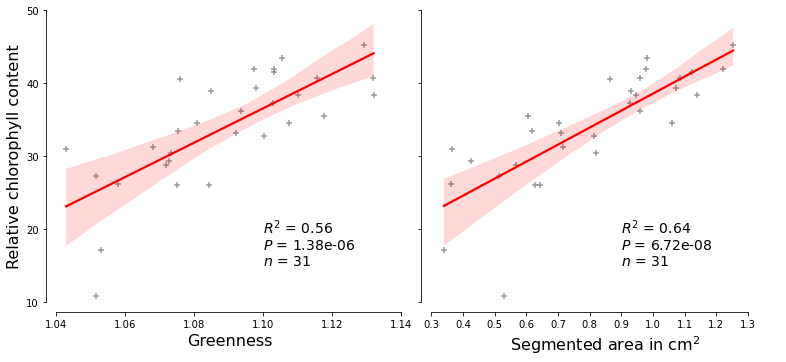

In [19]:
f,axes = plt.subplots(1,2,figsize=(11, 5),sharey=True)
#First figure
sns.regplot(x='Greenness', y='RelativeChlorophyll', 
           data=df, 
           scatter_kws={'color': 'gray'} ,
           line_kws={'color': 'r'},
           marker='+',
           ax=axes[0])

chloro_Greenness=pearsonr(df['RelativeChlorophyll'],df['Greenness'])
axes[0].text(1.1,15,'$\itR^2$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(chloro_Greenness[0]**2,
                                                                         chloro_Greenness[1],
                                                                         df.shape[0]),
                                                                         fontsize=14)
axes[0].yaxis.set_major_locator(ticker.MultipleLocator(10))   
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(0.02))  
axes[0].set_xlabel('Greenness',fontsize=16)
axes[0].set_ylabel('Relative chlorophyll content',fontsize=16)
axes[0].set_xlim([1.04,1.141])
axes[0].set_ylim([10,50])

#Second figure
sns.regplot(x='Area(cm2)', y='RelativeChlorophyll', 
           data=df, 
           scatter_kws={'color': 'gray'} ,
           line_kws={'color': 'r'},
           marker='+',
           ax=axes[1])

chloro_Area=pearsonr(df['RelativeChlorophyll'],df['Area(cm2)'])
axes[1].text(0.9,15,'$\itR^2$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(chloro_Area[0]**2,
                                                                         chloro_Area[1],
                                                                         df.shape[0]),
                                                                         fontsize=14)
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(10)) 
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axes[1].set_xlabel('Segmented area in cm$^2$',fontsize=16)
axes[1].set_ylabel('',fontsize=16)
axes[1].set_xlim([0.3,1.4])

plt.tight_layout()
sns.despine(offset=10, trim= True) 
plt.savefig("FigS1.png", format="png",bbox_inches="tight",facecolor="w",dpi=600)